# Variables aleatorias y la gaussiana

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

plt.rc("figure", dpi=100, figsize=(6, 3))

## Variable aleatoria

Una variable aleatoria es una magnitud que puede tomar distintos valores cada vez que la medimos.
Por ejemplo, el resultado de tirar una moneda o un dado.

Estas están descriptas por su distribución de probabilidad,
que le asigna una probabilidad a cada resultado posible.
Por ejemplo,
la distribución de Bernoulli,
que es la versión generalizada de la moneda,
es:

$$ B(x \,|\, p)
=
\begin{cases}
1-p &\text{ si } x=0 \\
p   &\text{ si } x=1 \\
\end{cases}
$$

Para una moneda,
los valores $x=0$ y $x=1$ los podemos pensar como cara y ceca,
respectivamente.
Si la moneda es "buena", entonces $p=1/2$:

$$ B(x \,|\, p=1/2)
=
\begin{cases}
1/2 &\text{ si } x=0 \text{ (ceca)} \\
1/2   &\text{ si } x=1 \text{ (cara)} \\
\end{cases}
$$

En Python,
podemos simular una variable aleatoria con el modulo `numpy.random`:

In [158]:
rng = np.random.default_rng(0)

Por ejemplo,
para simular una moneda,
podemos usar la siguiente función:

In [159]:
rng.integers(2)

1

que devuelve `0` o `1`,
con la misma probabilidad,
cada vez que la llamamos.

¿Cómo podriamos comprobar experimentalmente que se tiene la misma probabilidad de obtener cara o ceca con una moenda?

Podemos tirar la moneda muchas veces,
y contar la proporción que salió cara:

In [160]:
resultados = rng.integers(2, size=10)

resultados

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

Para contar un array de valores enteros,
podemos usar la función `np.bincount`:

In [161]:
np.bincount(resultados)

array([6, 4])

- 6 veces salió 0,
- 4 veces salió 1.

Es decir, $4 / 10 = 0.4 = 40\%$ de las veces salió cara.

En este caso,
también podiamos sumar el array (cuenta la cantidad de `1`),
y dividir por el tamaño del array (cantidad total de tiradas).
Es decir,
calcular el promedio:

In [164]:
np.mean(resultados)

0.4

Si repetimos el experimento con más tiradas,
vamos a obtener cada vez un valor más cercano al real:

In [165]:
rng.integers(2, size=100).mean()

0.56

In [166]:
rng.integers(2, size=1_000_000).mean()

0.50042

Es decir,
esta estimación tiene un error
que disminuye a medida que aumentamos la cantidad de tiradas.

## La gaussiana

En estadística,
la distribución gaussiana o normal es una de las distribuciones más importantes.
Su forma funcional es la siguiente:
$$ N(x) \propto e^{-x^2} $$
A diferencia de la moneda o el dado,
es una distribución continua.

En la versión más general,
se escribe con dos parámetros:

- $\mu$, que controla el centro de esta función, y
- $\sigma$, que controla el ancho,

$$ N(x \,|\, \mu, \sigma) = \frac{1}{\sqrt{2\pi} \; \sigma} \; \exp\left\{{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2} \right\} $$

Se puede ver algunos ejemplos en el siguiente gráfico:

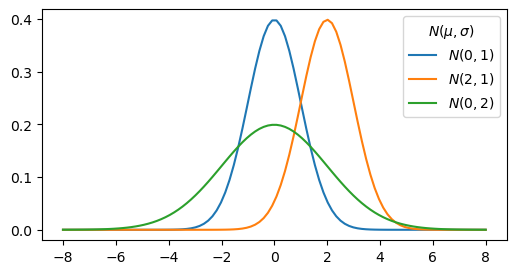

In [31]:
x = np.linspace(-8, 8, 100)
for mu, sigma in [(0, 1), (2, 1), (0, 2)]:
    plt.plot(
        x,
        scipy.stats.norm.pdf(x, loc=mu, scale=sigma),
        label=f"$N({mu},{sigma})$",
    )
plt.legend(title="$N(\mu,\sigma)$")

Generalmente,
se utiliza como aproximación para describir distribuciones de mediciones
donde no se conoce la distribución real.

### Estimando los parámetros

Dado un conjunto de mediciones $\{x_i\}$ con distribución gaussiana,
podemos estimar $\mu$ como el promedio $\bar{x}$:

$$ \bar{x} = \frac{1}{N} \sum_{i=0}^N x_i $$

y $\sigma$ como la desviación estándar $s$:

$$ s = \sqrt{\frac{1}{N-1} \sum_{i=0}^N (x_i - \bar{x})^2} $$

En Python,
Numpy ya tiene funciones implementadas para esto:
- `np.mean` para el promedio, y
- `np.std` para la desviación estándar.

:::{note}
Hay otras posibilidades para estimar estos parámetros.
Por ejemplo,
se podría usar la mediana para $\mu$.
:::

### ¿De dónde sale la gaussiana?

Según el [teorema central del límite](https://en.wikipedia.org/wiki/Central_limit_theorem),
bajo ciertas hipótesis,
la suma de $N$ variables aleatorias
tiende a una distribución gaussiana
cuando $N$ tiende a infinito.

:::{margin}
::::{tip}
Un buen video para ver más sobre esto
es uno de [3blue1brown](https://www.youtube.com/watch?v=zeJD6dqJ5lo).
::::
:::

¿Qué significa esto? Veámoslo con un ejemplo.

#### Suma de $N$ dados

Si tiramos $N$ dados de 6 caras y sumamos los números que salieron,
vamos a obtener un número entre $N$ y $6N$.

Pero, ¿todos van a tener la misma probabilidad?

Si hacemos dicho experimento muchas veces,
podemos hacer un histograma para responder esta pregunta.

Para simular un dado,
vamos a usar la misma función que antes
para generar números enteros equiprobables en el intervalo $[1, 7)$:

In [167]:
rng = np.random.default_rng()

rng.integers(1, 7)

2

Le podemos pedir que nos devuelva el resultado de 10 tiradas
en 2 filas de 5 tiradas:

In [173]:
resultados = rng.integers(1, 7, size=[2, 5])

resultados

array([[1, 4, 3, 4, 6],
       [3, 4, 3, 6, 2]])

y sumar por columnas:

In [174]:
resultados.sum(axis=0)

array([ 4,  8,  6, 10,  8])

con lo que obtenermos el resultado de 5 experimentos de sumar 2 dados.

Entonces,
hagamos una función `histograma_de_suma_de_datos` que:

1. Haga este experimento 10 mil veces,
para un dado $N$.
2. Haga un histograma (normalizado) de estos resultados.
3. Superponga una función gaussiana,
con $\mu$ y $\sigma$ dados por el promedio y desviación estándar de los resultados.

In [189]:
def histograma_de_suma_de_dados(*, n_dados, superponer_gaussiana=True):
    n_repeticiones = 10_000
    dados = np.random.randint(1, 7, size=(n_dados, n_repeticiones))
    suma_de_dados = dados.sum(axis=0)
    bins = np.arange(n_dados, 6 * n_dados + 2)

    plt.hist(suma_de_dados, bins=bins, align="left", edgecolor="black", density=True)

    if superponer_gaussiana:
        mu = np.mean(suma_de_dados)
        sigma = np.std(suma_de_dados)
        x = mu + sigma * np.linspace(-5, 5, 100)
        plt.plot(x, scipy.stats.norm.pdf(x, loc=mu, scale=sigma))

    plt.xlim(bins[0] - 1, bins[-1])

In [190]:
import ipywidgets

ipywidgets.interact(
    histograma_de_suma_de_dados,
    n_dados=ipywidgets.IntSlider(1, 1, 30),
    superponer_gaussiana=False,
)

interactive(children=(IntSlider(value=1, description='n_dados', max=30, min=1), Checkbox(value=False, descript…

<function __main__.histograma_de_suma_de_dados(*, n_dados, superponer_gaussiana=True)>

Si usamos esta función para $N=1$,
obtenemos el gráfico que vimos antes,
donde la gaussiana no es una buena aproximación:

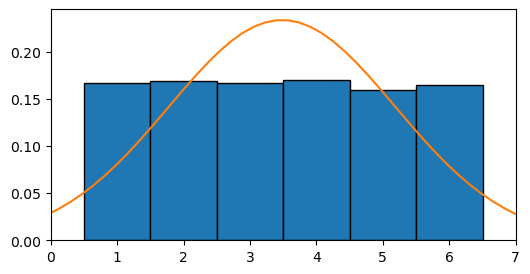

In [191]:
histograma_de_suma_de_dados(n_dados=1)

Para $N=2$,
la distribución ya no es uniforme,
y la gaussiana empieza a ser una mejor aproximación a estos datos:

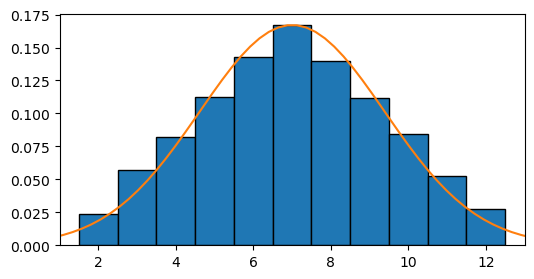

In [192]:
histograma_de_suma_de_dados(n_dados=2)

Para entender porque se obtuvo más veces $7$ que $2$,
hay que pensar que $2$ solo se puede obtener cuando ambos dados caen en $1$.
En cambio,
$7$ se puede fomar como $1+6$, $2+5$, $3+4$, etc.

Si seguimos aumentando la cantidad de dados que sumamos,
podemos ver que rápidamente se empieza a parecer a una distribución normal:

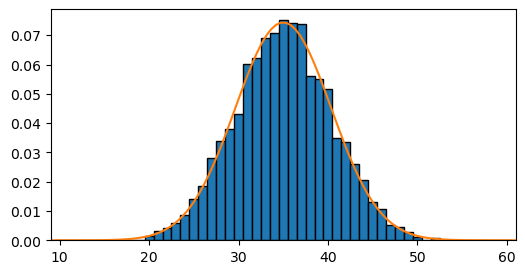

In [193]:
histograma_de_suma_de_dados(n_dados=10)

### ¿Por qué usamos la gaussiana?

En la práctica,
nuestras mediciones no van a ser estrictamente gaussianas.

Por ejemplo,
la gaussiana se extiende desde $-\infty$ a $\infty$,
En cambio,
si sumamos 10 dados,
sabemos que el mínimo valor que podemos obtener es 10,
y el máximo es 60.

Pero,
la probabilidad de obtener esos extremos es muy baja:

In [195]:
(1 / 6) ** 10

1.6538171687920194e-08

Calculando la inversa:

In [196]:
1 / (1 / 6) ** 10

60466176.00000003

esperamos que 1 de cada 60 millones de veces suceda (en promedio).

Como no sabemos cuantas variables aleatorias intervienen en nuestro proceso de medición,
usamos como aproximación una gaussiana.

Aunque no sea el caso para nuestras mediciones,
lo que si va a tener una distribución (muy) gaussiana
es el promedio de muchas mediciones.